In [6]:
# Imports and Dependencies 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as sts

# Establish filepath for U.S. energy census, GDP, and economic data
eiaGHGbysector_path = "input_data/pennsylvaniabysector_reformatted.xlsx"

# Import the books.csv file as a DataFrame as a multi-index data frame
# Ref: https://stackoverflow.com/questions/35300099/reading-excel-sheet-as-multiindex-dataframe-through-pd-read-excel
#ref: https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
eia_PAbysector_df = pd.read_excel(eiaGHGbysector_path, index_col=[0,1])
eia_PAbysector_df

1980  \
Sector                                         Fuel Type                                                    
Residential Sector                             Coal                                              0.728000   
                                               Petroleum Products                               13.155000   
                                               Natural Gas                                      15.634000   
                                               Total                                            29.518000   
Commercial Sector                              Coal                                              2.677000   
                                               Petroleum Products                                3.569000   
                                               Natural Gas                                       6.424000   
                                               Total                                            12.669000   
Industrial Sector                              Coal                                             52.345000   
                                               Petroleum Products                               17.707000   
                                               Natural Gas                                      18.251000   
                                               Total                                            88.303000   
Transportation Sector                          Coal                                              0.000000   
                                               Petroleum Products                               56.109000   
                                               Natural Gas                                       1.599000   
                                               Total                                            57.708000   
Electric Power Sector                          Coal                                             96.258000   
                                               Petroleum Products                                9.682000   
                                               Natural Gas                                       0.155000   
                                               Total                                           106.095000   
Grand Total                                    Grand Total                                     294.292000   
Fuel Totals                                    Coal                                            152.008000   
                                               Petroleum Products                              100.222000   
                                               Natural Gas                                      42.062000   
State allocation of national-level discrepancy State allocation of national-level discrepancy   -2.824329   
Total with discrepancy                         Total with discrepancy                          291.468120   

                                                                                                     1981  \
Sector                                         Fuel Type                                                    
Residential Sector                             Coal                                              0.745000   
                                               Petroleum Products                               11.503000   
                                               Natural Gas                                      15.497000   
                                               Total                                            27.745000   
Commercial Sector                              Coal                                              3.293000   
                                               Petroleum Products                                3.453000   
                                               Natural Gas                                       6.971000   
                                               Total               

In [7]:
#To maintain consistency with the facility level analysis, the year 2014 was isolated in this dataset
eia_PAbysector_2014df = pd.DataFrame(eia_PAbysector_df[2014])
# eia_bysector_2014df.loc[("Residential Sector", "Natural Gas"), 2014]
eia_PAbysector_2014df

2014
Sector                                         Fuel Type                                                 
Residential Sector                             Coal                                              0.000000
                                               Petroleum Products                                8.040000
                                               Natural Gas                                      14.206000
                                               Total                                            22.246000
Commercial Sector                              Coal                                              0.289000
                                               Petroleum Products                                2.013000
                                               Natural Gas                                       8.900000
                                               Total                                            11.202000
Industrial Sector                              Coal                                             20.693000
                                               Petroleum Products                               10.145000
                                               Natural Gas                                      22.265000
                                               Total                                            53.103000
Transportation Sector                          Coal                                              0.000000
                                               Petroleum Products                               58.422000
                                               Natural Gas                                       2.369000
                                               Total                                            60.790000
Electric Power Sector                          Coal                                             77.778000
                                               Petroleum Products                                0.536000
                                               Natural Gas                                      21.452000
                                               Total                                            99.766000
Grand Total                                    Grand Total                                     247.108000
Fuel Totals                                    Coal                                             98.760000
                                               Petroleum Products                               79.156000
                                               Natural Gas                                      69.191000
State allocation of national-level discrepancy State allocation of national-level discrepancy   -0.018811
Total with discrepancy                         Total with discrepancy                          247.088859

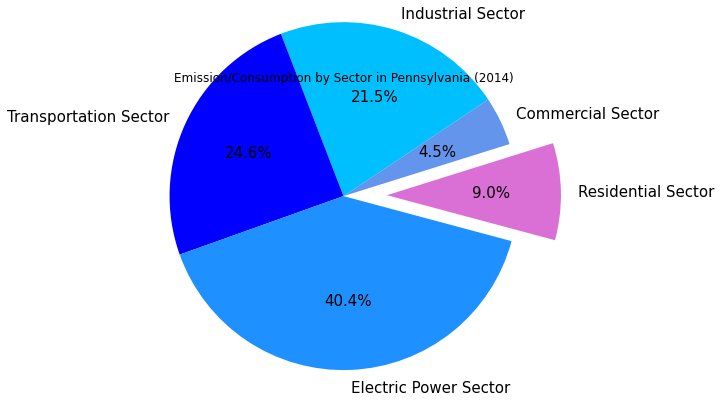

In [109]:
#Demonstrating fossil fuel emissions/consumption by sector using pie chart vizualization 
#ref: https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python

pie_values = [eia_PAbysector_2014df.loc[("Residential Sector", "Total"), 2014], 
         eia_PAbysector_2014df.loc[("Commercial Sector", "Total"), 2014], 
         eia_PAbysector_2014df.loc[("Industrial Sector", "Total"), 2014], 
         eia_PAbysector_2014df.loc[("Transportation Sector", "Total"), 2014], 
         eia_PAbysector_2014df.loc[("Electric Power Sector", "Total"), 2014]]

pie_labels = ["Residential Sector", "Commercial Sector","Industrial Sector", "Transportation Sector", "Electric Power Sector"]
colors = ["orchid", "cornflowerblue", "deepskyblue", "blue", "dodgerblue"]
explode = (0.5,0,0,0,0)

plt.pie(pie_values, explode=explode, labels=pie_labels, colors=colors,
        autopct="%1.1f%%", startangle = 345, radius = 2, textprops={'fontsize':15})
plt.show()

In [62]:
#Gathering emission/consumption by type per sector and storing in lists for bar chart visualization
coal = []
petroleum = []
naturalgas = []
catch = False

for row in eia_PAbysector_2014df[2014]: 
    
    indicies = eia_PAbysector_2014df.loc[eia_PAbysector_2014df[2014] == row, 2014].index.to_list()
    
    for index in indicies: 
        
#         print(index)

        if (index[0] == "Residential Sector"): 

#             print('IF check')

            if (index[1] == "Coal") & (catch == False):
                
#                 print('IF check')
                catch = True
                coal.append(row)
        
            if (index[1] == "Petroleum Products"):
                
                petroleum.append(row)
                
            if (index[1] == "Natural Gas"):
                
                naturalgas.append(row)
                
        if index[0] == "Commercial Sector": 

            if index[1] == "Coal":

                coal.append(row)
                
            if (index[1] == "Petroleum Products"):
                
                petroleum.append(row)
                
            if (index[1] == "Natural Gas"):
                
                naturalgas.append(row)

        if index[0] == "Industrial Sector":
            
#             print('IF check')
            if index[1] == "Coal":

                coal.append(row)

            if (index[1] == "Petroleum Products"):
                
                petroleum.append(row)
                
            if (index[1] == "Natural Gas"):
                
                naturalgas.append(row)            
        
            if index[1] == "Total":
            
                catch = False
                
        if (index[0] == "Transportation Sector"): 

            if (index[1] == "Coal") & (catch == False):

                coal.append(row)

            if (index[1] == "Petroleum Products"):
                
                petroleum.append(row)
                
            if (index[1] == "Natural Gas"):
                
                naturalgas.append(row)

        if index[0] == "Electric Power Sector": 

            if index[1] == "Coal":

                coal.append(row)
                
            if (index[1] == "Petroleum Products"):
                
                petroleum.append(row)
                
            if (index[1] == "Natural Gas"):
                
                naturalgas.append(row)
        
          

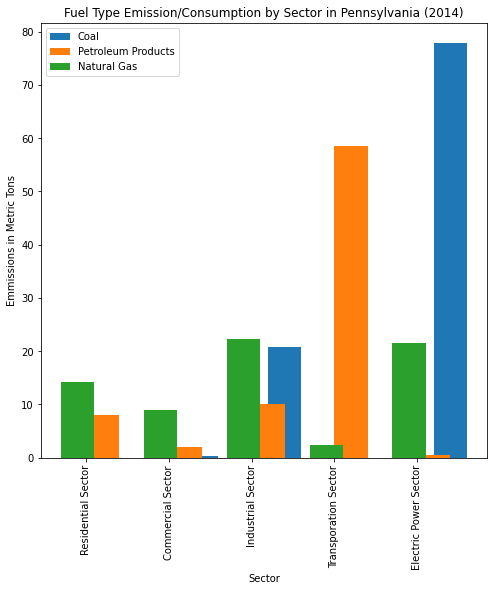

In [101]:
#Demonstrating fossil fuel emissions/consumption by sector and fuel type using bar graph visualization
#ref: https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

sectors = ["Residential Sector", "Commercial Sector", "Industrial Sector", "Transporation Sector", "Electric Power Sector"]
x_axis = np.arange(len(bar_labels))
bar_width = 0.4
fig = plt.gcf()
fig.set_size_inches(8,8)

plt.bar(x_axis + bar_width, coal, width=bar_width, label = 'Coal', align="edge")
plt.bar(x_axis + bar_width, petroleum, width=bar_width, label = 'Petroleum Products', align="center")
plt.bar(x_axis - 0.1, naturalgas, width=bar_width, label = 'Natural Gas', align="edge")

plt.xticks(x_axis + (bar_width/2), sectors, rotation=90)
plt.xlabel("Sector")
plt.ylabel("Emmissions in Metric Tons")
plt.title("Fuel Type Emission/Consumption by Sector in Pennsylvania (2014)")
plt.legend()
plt.show()
